### <font color='cian'>ENTREGA DE LA CONSIGNA #6 </font>

* COMISIÓN: <font color='cian'>23678CaC - Big Data /Data Anlaytics</font>

<font color='cian'>Archivos complementarios en FILES > Mi Proyecto > c23678-MariaBelenAreal-TPIntegrador</font>

# Códigos de consultas con python

### 1.- Importar las librerías y métodos para conectar/desconectar la BBDD en deepnote:

In [ ]:
# Des/conexión

import sqlite3 as sq3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display  # para mostrar display con el estilo DF de Jupiter Notebook

# CONEXION
def get_connetion():
    con = sq3.connect('/work/netflix_oscar.db')
    cur = con.cursor()
    print('Felicitaciones estas conectado a la BBDD Netflix_oscar')
    return con, cur

# DESCONEXION
def close_connetion():
    cur.close()
    con.close()
    print('Se ha cerrado la conexión')



### 2.- Querys, python y DF de Pandas:

In [ ]:
# No nulos
con, cur = get_connetion() 
con_content = 'SELECT * FROM content' 
cur.execute(con_content) 
res_content = cur.fetchall()  
print(type(res_content))
print(res_content[0])

Felicitaciones estas conectado a la BBDD Netflix_oscar
<class 'list'>
(1, 'Movie', 'Dick Johnson Is Dead', 'Kirsten Johnson', None, 'United States', 'September 25, 2021', 2020, 'PG-13', '90 min', 'Documentaries', 'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.', 1)


In [ ]:
# Nombre de las columnas
col_content = 'PRAGMA table_info(content)'
tablainfo_content = cur.execute(col_content)
tablainfo_content = tablainfo_content.fetchall()
print(tablainfo_content)
nombre_col_content = []
for i in tablainfo_content:
    nombre_col_content.append(i[1])

print(nombre_col_content)

[(0, 'id_content', 'INTEGER', 0, None, 1), (1, 'type', 'VARCHAR(50)', 0, None, 0), (2, 'title_content', 'VARCHAR(64)', 0, None, 0), (3, 'director', 'VARCHAR(64)', 0, None, 0), (4, 'cast', 'VARCHAR(1024)', 0, None, 0), (5, 'country', 'VARCHAR(128)', 0, None, 0), (6, 'date_added', 'VARCHAR(50)', 0, None, 0), (7, 'release_year', 'INTEGER', 0, None, 0), (8, 'rating', 'VARCHAR(50)', 0, None, 0), (9, 'duration', 'VARCHAR(50)', 0, None, 0), (10, 'listed_in', 'VARCHAR(128)', 0, None, 0), (11, 'description', 'VARCHAR(256)', 0, None, 0), (12, 'see_content', 'INTEGER', 0, 'TRUE', 0)]
['id_content', 'type', 'title_content', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'see_content']


In [ ]:
# Creamos el objeto DataFrame
content_df = pd.DataFrame(res_content, columns=nombre_col_content)
content_df.head()

,id_content,type,title_content,director,cast,country,date_added,release_year,rating,duration,listed_in,description,see_content
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1


In [ ]:
# Cantidad de nulos 
content_nulos = content_df.isnull().sum()
print(content_df.isnull().sum())
print(type(content_df.isnull().sum()))

id_content          0
type                0
title_content       0
director         2624
cast              814
country           824
date_added         10
release_year        0
rating              7
duration            0
listed_in           0
description         0
see_content         0
dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
content_df.isnull().sum()['director']

2624

In [ ]:
# Cantidad de NO nulos 
content_nonulos = content_df.notnull().sum()
print(content_nonulos)

id_content       8745
type             8745
title_content    8745
director         6121
cast             7931
country          7921
date_added       8735
release_year     8745
rating           8738
duration         8745
listed_in        8745
description      8745
see_content      8745
dtype: int64


In [ ]:
# Distintos Registros 
# content_df['type'].unique()---> unique nos devuelve los registros únicos
content_unicos = content_df.nunique()
print(type(content_df.nunique()))
print(content_df.nunique())

<class 'pandas.core.series.Series'>
id_content       8745
type                2
title_content    8745
director         4488
cast             7643
country           744
date_added       1759
release_year       74
rating             14
duration          220
listed_in         513
description      8714
see_content         1
dtype: int64


In [ ]:
# vacias (string vacía) ""/''
vacios_content = []
for col in nombre_col_content :
    contador = 0
    for i in range(len(content_df)):
        if content_df.iloc[i][col] =='':
           contador = contador + 1
    vacios_content.append(contador)

print(vacios_content)
print(len(vacios_content))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13


In [ ]:
content_vacios = pd.Series(vacios_content, index = nombre_col_content )
print(content_vacios)

id_content       0
type             0
title_content    0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
see_content      0
dtype: int64


In [ ]:
# content_nulos, content_nonulos, content_unicos, content_vacios
print(content_nulos,"\n")
print(content_nonulos,"\n")
print(content_unicos,"\n")
print(content_vacios,"\n")

id_content          0
type                0
title_content       0
director         2624
cast              814
country           824
date_added         10
release_year        0
rating              7
duration            0
listed_in           0
description         0
see_content         0
dtype: int64 

id_content       8745
type             8745
title_content    8745
director         6121
cast             7931
country          7921
date_added       8735
release_year     8745
rating           8738
duration         8745
listed_in        8745
description      8745
see_content      8745
dtype: int64 

id_content       8745
type                2
title_content    8745
director         4488
cast             7643
country           744
date_added       1759
release_year       74
rating             14
duration          220
listed_in         513
description      8714
see_content         1
dtype: int64 

id_content       0
type             0
title_content    0
director         0
cast             0
co

In [ ]:
content_total = pd.concat([content_nulos, content_nonulos, content_unicos, content_vacios], axis = 1)
print(type(content_total))
print(content_total)

<class 'pandas.core.frame.DataFrame'>
                  0     1     2  3
id_content        0  8745  8745  0
type              0  8745     2  0
title_content     0  8745  8745  0
director       2624  6121  4488  0
cast            814  7931  7643  0
country         824  7921   744  0
date_added       10  8735  1759  0
release_year      0  8745    74  0
rating            7  8738    14  0
duration          0  8745   220  0
listed_in         0  8745   513  0
description       0  8745  8714  0
see_content       0  8745     1  0


In [ ]:
content_total = content_total.transpose()
indice_content = ['content_nulos', 'content_nonulos', 'content_unicos', 'content_vacios']
content_total['indice']=indice_content
content_total.set_index('indice', inplace=True)
print(content_total)


                 id_content  type  title_content  director  cast  country  \
indice                                                                      
content_nulos             0     0              0      2624   814      824   
content_nonulos        8745  8745           8745      6121  7931     7921   
content_unicos         8745     2           8745      4488  7643      744   
content_vacios            0     0              0         0     0        0   

                 date_added  release_year  rating  duration  listed_in  \
indice                                                                   
content_nulos            10             0       7         0          0   
content_nonulos        8735          8745    8738      8745       8745   
content_unicos         1759            74      14       220        513   
content_vacios            0             0       0         0          0   

                 description  see_content  
indice                                     
cont

In [ ]:
### PRODUCTION
con_prod = 'SELECT * FROM production' 

cur.execute(con_prod) 
res_prod = cur.fetchall()  
col_prod = 'PRAGMA table_info(production)'
tablainfo_prod = cur.execute(col_prod)
tablainfo_prod = tablainfo_prod.fetchall()

nombre_col_prod = []
for i in tablainfo_prod:
   nombre_col_prod.append(i[1])


production_df = pd.DataFrame(res_prod, columns=nombre_col_prod)

# Cantidad de nulos
production_nulos = production_df.isnull().sum()

# Cantidad de No nulos
production_nonulos = production_df.notnull().sum()

# Cantidad de registros únicos
production_unicos = production_df.nunique()

# Cantidad de registros vacíos
vacios_prod = []
for col in nombre_col_prod :
    contador = 0
    for i in range(len(production_df)):
        if production_df.iloc[i][col] == '':
           contador = contador + 1
    vacios_prod.append(contador)
production_vacios = pd.Series(vacios_prod, index = nombre_col_prod)

production_total = pd.concat([production_nulos, production_nonulos, production_unicos, production_vacios], axis = 1)

production_total = production_total.transpose()
indice_production = ['production_nulos', 'production_nonulos', 'production_unicos', 'production_vacios']
production_total['indice']=indice_production
production_total.set_index('indice', inplace=True)
print(production_total)

                    id_production  id_content  title_production  genre  \
indice                                                                   
production_nulos                0           0                 0      0   
production_nonulos            551         551               551    551   
production_unicos             551         551               551    110   
production_vacios               0           0                 0      0   

                    premiere  runtime  imdb_score  language  see_production  
indice                                                                       
production_nulos           0        0           0         0               0  
production_nonulos       551      551         551       551             551  
production_unicos        370      118          52        37               1  
production_vacios          0        0           0         0               0  


In [ ]:
### OSCAR
con_oscar = 'SELECT * FROM oscar' # Definimos la consulta

cur.execute(con_oscar) # Usamos el objeto cur para realizar la consulta 
res_oscar = cur.fetchall()  # Mediante fetchall() obtengo los registros 
col_oscar = 'PRAGMA table_info(oscar)'
tablainfo_oscar = cur.execute(col_oscar)
tablainfo_oscar = tablainfo_oscar.fetchall()

nombre_col_oscar = []
for i in tablainfo_oscar:
   nombre_col_oscar.append(i[1])

oscar_df = pd.DataFrame(res_oscar, columns=nombre_col_oscar)

# Cantidad de nulos
oscar_nulos = oscar_df.isnull().sum()

# Cantidad de No nulos
oscar_nonulos = oscar_df.notnull().sum()

# Cantidad de registros únicos
oscar_unicos = oscar_df.nunique()

# Cantidad de registros vacíos
vacios_oscar = []
for col in nombre_col_oscar :
    contador = 0
    for i in range(len(oscar_df)):
        if oscar_df.iloc[i][col] == '':
           contador = contador + 1
    vacios_oscar.append(contador)
oscar_vacios = pd.Series(vacios_oscar, index = nombre_col_oscar)

oscar_total = pd.concat([oscar_nulos, oscar_nonulos, oscar_unicos, oscar_vacios], axis = 1)

oscar_total = oscar_total.transpose()
indice_oscar = ['oscar_nulos', 'oscar_nonulos', 'oscar_unicos', 'oscar_vacios']
oscar_total['indice']=indice_oscar
oscar_total.set_index('indice', inplace=True)
print(oscar_total)


               id_oscar  id_inf  id_res  id_content  title_oscar  \
indice                                                             
oscar_nulos           0       0       0        2314            0   
oscar_nonulos      2758    2758    2758         444         2758   
oscar_unicos       2758     530    2754          78          530   
oscar_vacios          0       0       0           0            0   

               year_ceremony  category  name  winner  directed_by  ...  \
indice                                                             ...   
oscar_nulos                0         0     0       0            5  ...   
oscar_nonulos           2758      2758  2758    2758         2753  ...   
oscar_unicos              91        93  2164       2          391  ...   
oscar_vacios               0         0     0       0            0  ...   

               starring  distributed_by  budget  budget_x_million  box_office  \
indice                                                           

In [ ]:
# Cerramos la conexión 
close_connetion()

Se ha cerrado la conexión


In [ ]:
# Consultas en DF
# Para ejecutar esta celda debe haberse ejecutado la primera celda llamada # Des/conexión
con, cur = get_connetion()

Felicitaciones estas conectado a la BBDD Netflix_oscar


In [ ]:
# Obtener el DF de cada una de las tablas de la BBDD con la query apropiada, junto al método 
# .read_sql() de pandas, puede revisar el crud para recordar cómo hacerlo.

# TABLA CONTENT
content2_df = pd.read_sql('SELECT * FROM content', con)
content2_df.head()


,id_content,type,title_content,director,cast,country,date_added,release_year,rating,duration,listed_in,description,see_content
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1


In [ ]:
# TABLA PRODUCTION
production2_df = pd.read_sql('SELECT * FROM production', con)
production2_df.head()

,id_production,id_content,title_production,genre,premiere,runtime,imdb_score,language,see_production
0,1,1,Dick Johnson Is Dead,Documentary,"October 2, 2020",90,7.5,English,1
1,2,1093,Dolly Parton: A MusiCares Tribute,Documentary,"April 7, 2021",55,6.5,English,1
2,3,1071,Why Did You Kill Me?,Documentary,"April 14, 2021",83,5.6,English,1
3,4,142,Extraction,Action,"April 24, 2020",117,6.7,English,1
4,5,3988,Antoine Griezmann: The Making of a Legend,Documentary,"March 21, 2019",60,6.5,French,1


In [ ]:
# TABLA OSCAR
oscar2_df = pd.read_sql('SELECT * FROM oscar', con)
oscar2_df.head()

,id_oscar,id_inf,id_res,id_content,title_oscar,year_ceremony,category,name,winner,directed_by,...,starring,distributed_by,budget,budget_x_million,box_office,box_office_x_million,imdb,metascore,rotten_tomatoes,see_oscar
0,1,26,10359,NaN,1917,2020,CINEMATOGRAPHY,Roger Deakins,1,Sam Mendes,...,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0,1
1,2,26,10368,NaN,1917,2020,DIRECTING,Sam Mendes,0,Sam Mendes,...,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0,1
2,3,26,10395,NaN,1917,2020,MAKEUP AND HAIRSTYLING,Naomi Donne. Tristan Versluis and Rebecca Cole,0,Sam Mendes,...,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0,1
3,4,26,10399,NaN,1917,2020,MUSIC (Original Score),Thomas Newman,0,Sam Mendes,...,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0,1
4,5,26,10412,NaN,1917,2020,BEST PICTURE,Sam Mendes. Pippa Harris. Jayne-Ann Tenggren a...,0,Sam Mendes,...,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0,1


#### i.  Listar todos los registros de la tabla, visualizando las columnas type, title_content, country, rating, duration, listed_in.


In [ ]:
content2_df[['type', 'title_content', 'country', 'rating', 'duration', 'listed_in']]


,type,title_content,country,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,None,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,None,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...
8740,Movie,Zodiac,United States,R,158 min,"Cult Movies, Dramas, Thrillers"
8741,TV Show,Zombie Dumb,None,TV-Y7,2 Seasons,"Kids TV, Korean TV Shows, TV Comedies"
8742,Movie,Zombieland,United States,R,88 min,"Comedies, Horror Movies"
8743,Movie,Zoom,United States,PG,88 min,"Children & Family Movies, Comedies"


#### ii. Generar un listado de todas las películas en las que participe Argentina, mostrando las columnas id_content, type, title_content, director, cast, rating, duration, listed_in.

In [ ]:
content2_df[content2_df['country'] == 'Argentina'][['type', 'title_content', 'director','cast','rating', 'duration', 'listed_in']]

,type,title_content,director,cast,rating,duration,listed_in
272,TV Show,The Kingdom,None,"Chino Darín, Nancy Dupláa, Joaquín Furriel, Pe...",TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis..."
299,Movie,Esperando la carroza 2,Gabriel Condron,"Luis Brandoni, Betiana Blum, Roberto Carnaghi,...",TV-MA,88 min,"Comedies, Cult Movies, International Movies"
430,TV Show,Okupas,None,"Rodrigo de la Serna, Diego Alonso, Ariel Stalt...",TV-MA,1 Season,"Classic & Cult TV, Crime TV Shows, Internation..."
667,TV Show,No Time for Shame,None,Santiago Artemis,TV-MA,1 Season,"International TV Shows, Reality TV, Spanish-La..."
703,TV Show,Millennials,None,"Nicolás Riera, Laura Laprida, Juan Manuel Guil...",TV-MA,3 Seasons,"International TV Shows, Romantic TV Shows, Spa..."
761,Movie,From Stress to Happiness,"Alejandro De Grazia, Juan Stadler",None,TV-G,58 min,"Documentaries, International Movies"
830,Movie,Soy Rada: Serendipity,Pablo Faro,Agustín Aristarán,TV-MA,70 min,Stand-Up Comedy
1403,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",TV-MA,81 min,"International Movies, Thrillers"
1641,Movie,Notes for My Son,Carlos Sorín,"Valeria Bertuccelli, Esteban Lamothe, Julián S...",TV-MA,84 min,"Dramas, International Movies"
1697,Movie,Memories of a Teenager,Lucas Santa Ana,"Renato Quattordio, Malena Narvay, Thomás Leper...",TV-MA,97 min,"Dramas, International Movies, LGBTQ Movies"


#### iii Presentar un listado con las columnas id_production, title_production, genre, language, imdb_score de los registros de la tabla en las que el imdb_score sea superior a 7.5

In [ ]:
production2_df[production2_df['imdb_score']>7.5][['id_production','title_production', 'genre', 'language','imdb_score']]

,id_production,title_production,genre,language,imdb_score
33,34,Seaspiracy,Documentary,English,8.2
84,86,If Anything Happens I Love You,Animation / Short,English,7.8
88,90,Ludo,Anthology/Dark comedy,Hindi,7.6
105,107,The Trial of the Chicago 7,Drama,English,7.8
108,110,The Three Deaths of Marisela Escobedo,Documentary,Spanish,8.2
112,114,David Attenborough: A Life on Our Planet,Documentary,English,9.0
128,130,The Social Dilemma,Documentary,English,7.6
129,131,My Octopus Teacher,Documentary,English,8.1
160,163,Athlete A,Documentary,English,7.6
183,186,A Secret Love,Documentary,English,7.9


#### iv. Seleccionar los títulos con runtime superior a 90 y lenguaje Francés. Incluir el tipo de contenido. Ordenar los títulos de menor a mayor

In [ ]:
## Merge

df_union = content_df.merge(production_df, how = 'inner', right_on = 'id_content', left_on = 'id_content')

df_union[(df_union['runtime'] > 90) & (df_union['language'] == 'French')].sort_values('title_content')

,id_content,type,title_content,director,cast,country,date_added,release_year,rating,duration,...,description,see_content,id_production,title_production,genre,premiere,runtime,imdb_score,language,see_production
168,2164,Movie,Anelka: Misunderstood,Franck Nataf,Nicolas Anelka,France,"August 5, 2020",2020,TV-14,95 min,...,"Inscrutable, incomparable or both? Famed Frenc...",1,147,Anelka: Misunderstood,Documentary,"August 5, 2020",94,6.4,French,1
126,1875,Movie,Bigflo & Oli: Hip Hop Frenzy,"Bigflo & Oli, Jérémie Levypon",Bigflo & Oli,France,"October 8, 2020",2020,TV-MA,100 min,...,Go backstage with French rap duo Bigflo & Oli ...,1,544,Bigflo & Oil: Hip Hop Frenzy,Documentary,"October 8, 2020",100,6.9,French,1
141,1985,Movie,GIMS: On the Record,Florent Bodin,Maître Gims,France,"September 17, 2020",2020,TV-MA,96 min,...,Go backstage with beloved rap superstar Gims i...,1,124,GIMS: On the Record,Documentary,"September 17, 2020",96,6.8,French,1
428,4930,Movie,I Am not an Easy Man,Eleonore Pourriat,"Vincent Elbaz, Marie-Sophie Ferdane, Pierre Be...",France,"April 13, 2018",2018,TV-MA,99 min,...,A shameless chauvinist gets a taste of his own...,1,525,I Am Not an Easy Man,Romantic comedy,"April 13, 2018",98,6.3,French,1
188,2359,Movie,Lost Bullet,Guillaume Pierret,"Alban Lenoir, Nicolas Duvauchelle, Ramzy Bedia...",France,"June 19, 2020",2020,TV-MA,93 min,...,"Facing a murder charge, a genius mechanic with...",1,167,Lost Bullet,Thriller,"June 19, 2020",92,6.2,French,1
29,1111,Movie,Madame Claude,Sylvie Verheyde,"Karole Rocher, Garance Marillier, Roschdy Zem,...",France,"April 2, 2021",2021,TV-MA,113 min,...,"In 1960s Paris, Madame Claude's influence exte...",1,29,Madame Claude,Drama,"April 2, 2021",112,5.4,French,1
12,896,Movie,Oxygen,Alexandre Aja,"Mélanie Laurent, Mathieu Amalric, Malik Zidi","France, United States","may 12, 2021",2021,TV-14,102 min,...,"After waking up in a cryogenic unit, Liz fight...",1,12,Oxygen,Science fiction thriller,"may 12, 2021",101,6.5,French,1
108,1781,Movie,Rogue City,Olivier Marchal,"Lannick Gautry, Stanislas Merhar, Kaaris, Davi...",France,"October 30, 2020",2020,TV-MA,116 min,...,Caught in the crosshairs of police corruption ...,1,96,Rogue City,Crime drama,"October 30, 2020",116,6.1,French,1
280,3426,Movie,Street Flow,"Leïla Sy, Kery James","Kery James, Jammeh Diangana, Chloé Jouannet, B...",France,"October 13, 2019",2019,TV-MA,96 min,...,"Three brothers – a gangster, a scholar and an ...",1,251,Street Flow,Drama,"October 12, 2019",96,6.4,French,1
50,1330,Movie,The Misadventures of Hedi and Cokeman,Julien Royal,"Hedi Bouchenafa, Nassim Lyes, Fred Testot, Jul...",France,"February 10, 2021",2021,TV-MA,99 min,...,"In Paris, two dysfunctional dealers use family...",1,46,The Misadventures of Hedi and Cokeman,Comedy,"February 10, 2021",99,4.5,French,1


In [ ]:
print(len(production_df))

551


In [ ]:
# Cerramos la conexión 
close_connetion()

Se ha cerrado la conexión


In [ ]:
# HHCC en DF
set_total = pd.read_csv('/work/set_total.csv')
set_total.head()

,id_content,type,title_content,release_year,cast,director,country,rating,duration,listed_in,...,title_oscar,category,name,year_ceremony,winner,directed_by,starring,budget_x_million,box_office_x_million,imdb
0,1.0,Movie,Dick Johnson Is Dead,2020.0,NaN,Kirsten Johnson,United States,PG-13,90 min,Documentaries,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,TV Show,Blood & Water,2021.0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",NaN,South Africa,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,TV Show,Ganglands,2021.0,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Julien Leclercq,NaN,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,TV Show,Jailbirds New Orleans,2021.0,NaN,NaN,NaN,TV-MA,1 Season,"Docuseries, Reality TV",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,TV Show,Kota Factory,2021.0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",NaN,India,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# i Duplicados
set_total.duplicated().sum() # cantidad de registros repetidos
set_total[set_total.duplicated()] # registros duplicados
print(set_total.shape)
set_total.drop_duplicates(inplace = True)
print(set_total.shape)

(11427, 23)
(11425, 23)


In [ ]:
## ii. Tipo de dato
# set_total.dtypes
# set_total['id_content'] = set_total['id_content'].astype('int64')
# set_total['id_content'].isnull().sum()
set_total['id_content'].fillna(0, inplace=True)
set_total['id_content'].isnull().sum()
set_total['id_content'] = set_total['id_content'].astype('int64')
set_total.dtypes


id_content                int64
type                     object
title_content            object
release_year            float64
cast                     object
director                 object
country                  object
rating                   object
duration                 object
listed_in                object
runtime                 float64
imdb_score              float64
language                 object
title_oscar              object
category                 object
name                     object
year_ceremony           float64
winner                  float64
directed_by              object
starring                 object
budget_x_million        float64
box_office_x_million    float64
imdb                    float64
dtype: object

### 3.- Python, DF de Pandas y Visualización:

### Matplotlib

#### i. Realizar un gráfico que muestre la relación entre la cantidad de series y películas disponibles en Netflix.

In [ ]:
content_agrupado = content_df.groupby('type').count()

content_agrupado

,id_content,title_content,director,cast,country,date_added,release_year,rating,duration,listed_in,description,see_content
type,,,,,,,,,,,,
Movie,6084,6084,5902,5616,5649,6084,6084,6079,6084,6084,6084,6084
TV Show,2661,2661,219,2315,2272,2651,2661,2659,2661,2661,2661,2661


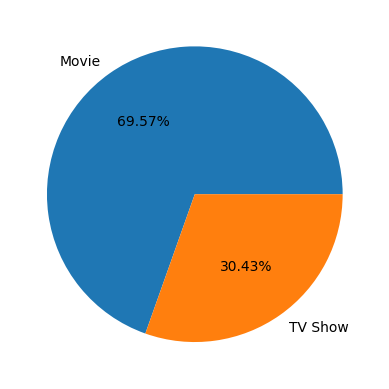

In [ ]:
# content_df.columns
content_agrupado = content_df.groupby('type').count()


fig, ax = plt.subplots()
ax.pie(content_agrupado['id_content'], labels=content_agrupado.index, autopct = '%.2f%%')
plt.show()

#### ii. Realizar un gráfico a partir de los países que tienen mayor cantidad total de títulos en la plataforma, desglosando por tipo de contenido, mostrando la información sólo para los primeros 10 países (mostrar el desglose por tipo de contenido), Obvie las cooperaciones entre países.

In [ ]:
# content_df.groupby('country').count()

## Nulos
# content_df['country'].notnull()
# content_df['country'] = content_df[content_df['country'].notnull()]

## Si uso la siguiente línea me corre lo demás pero está vacio de valores
# content_df['country'] = content_df['country'].astype(str)

## Saco las colaboraciones
# content_df['country'].isnull().sum()
# content_df[content_df['country'].str.contains(',')]
# content_df['country'].str.contains(',')


In [ ]:
content_df.columns

Index(['id_content', 'type', 'title_content', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'see_content'],
      dtype='object')

In [ ]:
## Agrupar según country
content_df = content_df[['country', 'type']]
content_agrupado2 = content_df.groupby(['country', 'type'])['type'].count().unstack()
#content_agrupado2.columns

In [ ]:
content_df.groupby(['country', 'type'])['type'].count().unstack()

type,Movie,TV Show
country,,
Argentina,38.0,18.0
"Argentina, Brazil, France, Poland, Germany, Denmark",1.0,NaN
"Argentina, Chile",2.0,NaN
"Argentina, Chile, Peru",1.0,NaN
"Argentina, France",1.0,NaN
...,...,...
Venezuela,1.0,NaN
"Venezuela, Colombia",1.0,NaN
Vietnam,7.0,NaN


In [ ]:
content_agrupado2['total'] = content_agrupado2['Movie'] +  content_agrupado2['TV Show']
content_top10 = content_agrupado2.sort_values(by = 'total', ascending=False).head(10)

content_top10.drop('total', axis=1, inplace = True)

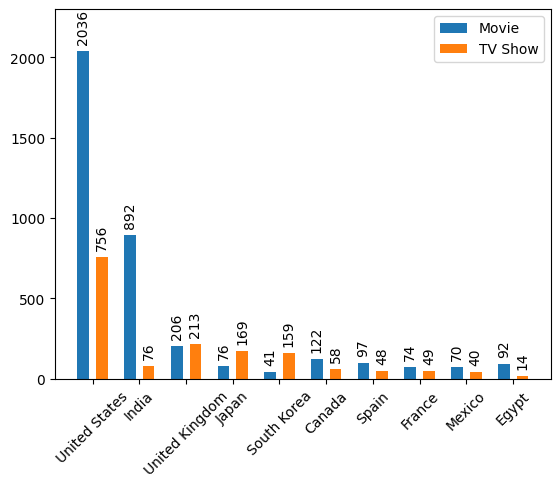

In [ ]:
numero_barras = len(content_top10.index)
x = np.arange(numero_barras) # posición de la barra
ancho = 0.25

fig, ax = plt.subplots()
delta = 0.2
for tipo in list(content_top10.columns):
    p = ax.bar(x - delta, content_top10[tipo], width = ancho, label = tipo)
    delta = -0.2
    ax.bar_label(p, rotation = 90, padding = 5)

plt.xticks(x, content_top10.index, rotation = 45)
ax.legend()
ax.set_ylim(0, 2300)
plt.show()

### Seaborn

#### i. Gráfico de los 20 directores con más producciones



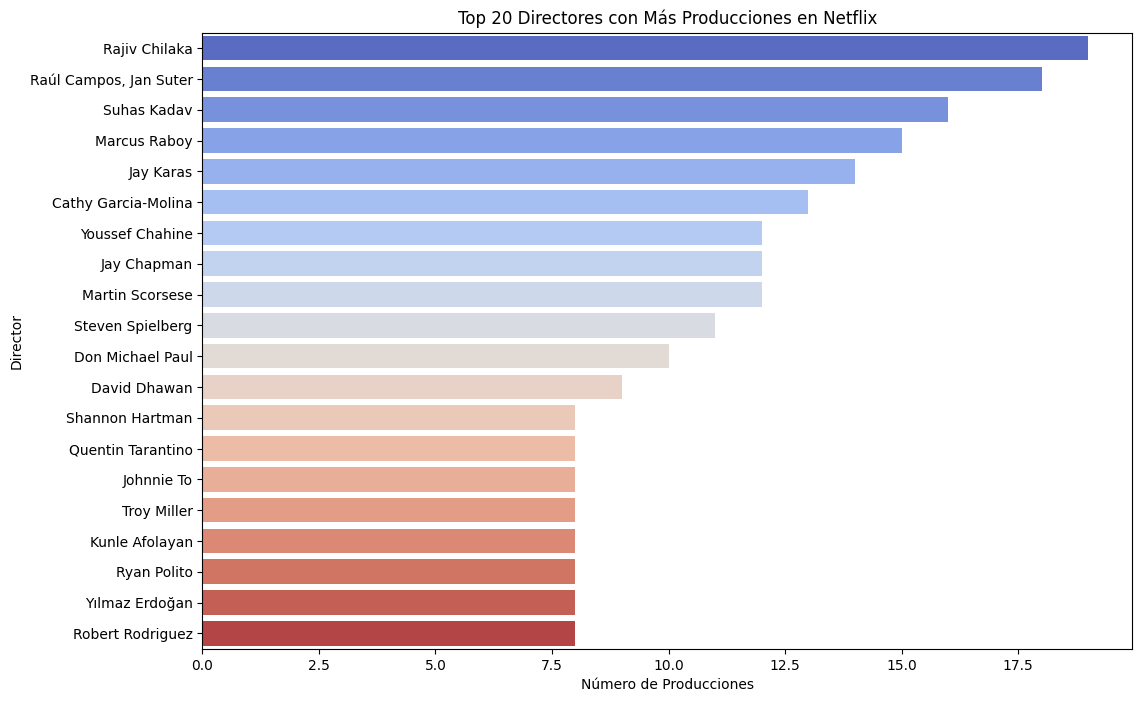

In [ ]:
directores_df = content2_df['director'].value_counts().head(20).reset_index()
directores_df.columns = ['director', 'see_content']

plt.figure(figsize=(12, 8))
sns.barplot(x='see_content', y='director', data=directores_df, palette='coolwarm')
plt.title("Top 20 Directores con Más Producciones en Netflix")
plt.xlabel("Número de Producciones")
plt.ylabel("Director")
plt.show()

#### ii. Gráfico de los 20 géneros con mayor cantidad de producciones

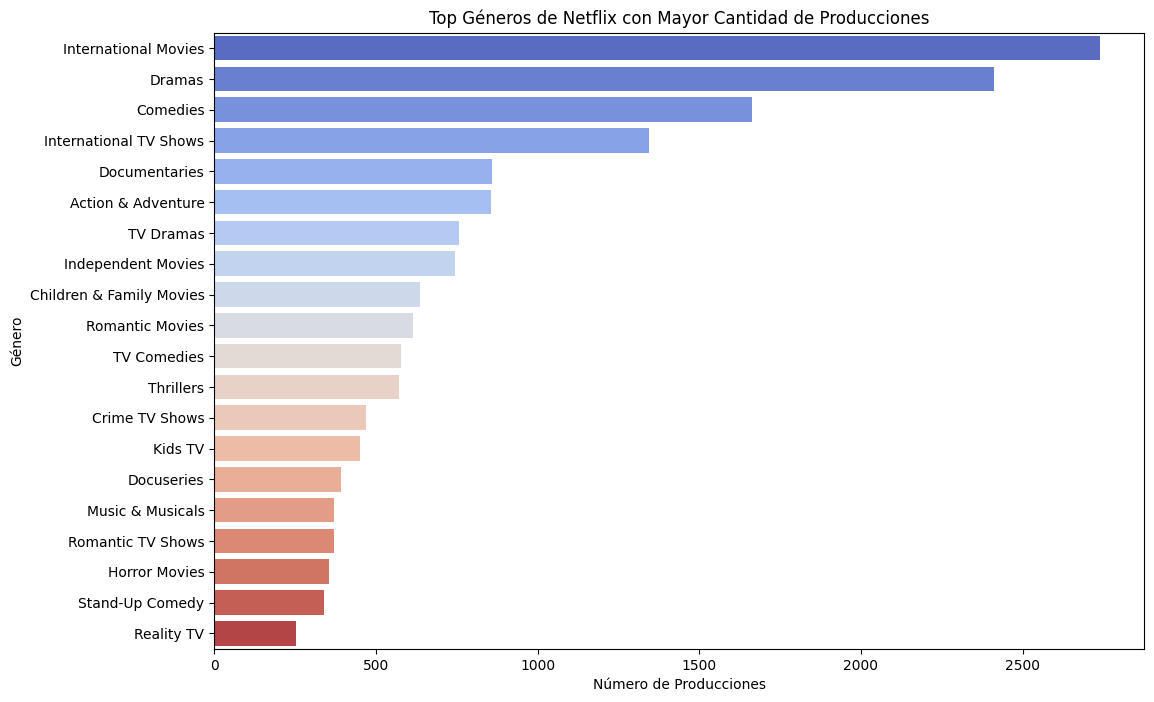

In [ ]:
generos_df = content2_df['listed_in'].value_counts().head(20).reset_index()
generos_df.columns = ['listed_in', 'see_content']

categories = content2_df['listed_in'].str.split(', ', expand=True).stack()
categories_df = categories.value_counts().reset_index()
categories_df.columns = ['Genre', 'Number of Productions']

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Productions', y='Genre', data=categories_df.head(20), palette='coolwarm')
plt.title("Top Géneros de Netflix con Mayor Cantidad de Producciones")
plt.xlabel("Número de Producciones")
plt.ylabel("Género")
plt.show()

#### iii. Gráfico de clasificaciones por público desglosadas por tipo de contenido

<Figure size 1200x800 with 0 Axes>

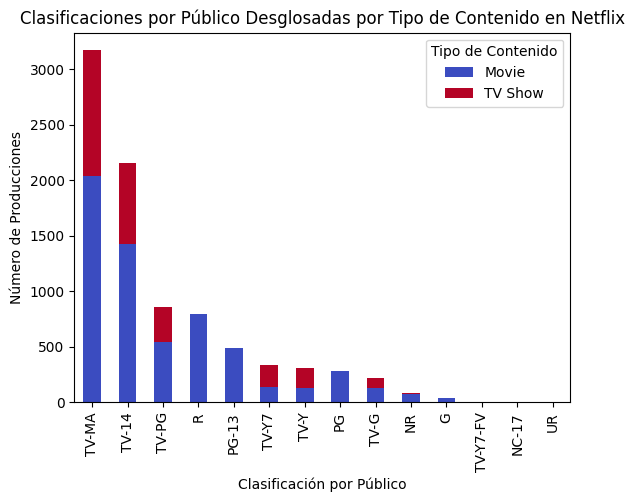

In [ ]:
clasificaciones_df = content2_df.groupby(['rating', 'type']).size().unstack().fillna(0)
clasificaciones_df = clasificaciones_df.sort_values(by='Movie', ascending=False)


clasificaciones_df['Total'] = clasificaciones_df['Movie'] + clasificaciones_df['TV Show']

clasificaciones_df = clasificaciones_df.sort_values(by='Total', ascending=False)

clasificaciones_df.drop(columns='Total', inplace=True)

plt.figure(figsize=(12, 8))
clasificaciones_df.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Clasificaciones por Público Desglosadas por Tipo de Contenido en Netflix")
plt.xlabel("Clasificación por Público")
plt.ylabel("Número de Producciones")
plt.legend(title="Tipo de Contenido")
plt.show()

#### iv. Gráfico de los 15 idiomas con mayor cantidad de películas (excluyendo inglés)

In [ ]:
# idiomas_df = content2_df[content2_df['type'] == 'Movie']
# idiomas_df = idiomas_df[idiomas_df['language'] != 'English']['language'].value_counts().head(15).reset_index()
# idiomas_df.columns = ['Idioma', 'Número de Películas']

# plt.figure(figsize=(12, 8))
# sns.barplot(x='Número de Películas', y='Idioma', data=idiomas_df, palette='coolwarm')
# plt.title("Top 15 Idiomas de Películas con Mayor Cantidad de Títulos en Netflix (sin contar inglés)")
# plt.xlabel("Número de Películas")
# plt.ylabel("Idioma")
# plt.show()

In [ ]:
production_df

,id_production,id_content,title_production,genre,premiere,runtime,imdb_score,language,see_production
0,1,1,Dick Johnson Is Dead,Documentary,"October 2, 2020",90,7.5,English,1
1,2,1093,Dolly Parton: A MusiCares Tribute,Documentary,"April 7, 2021",55,6.5,English,1
2,3,1071,Why Did You Kill Me?,Documentary,"April 14, 2021",83,5.6,English,1
3,4,142,Extraction,Action,"April 24, 2020",117,6.7,English,1
4,5,3988,Antoine Griezmann: The Making of a Legend,Documentary,"March 21, 2019",60,6.5,French,1
...,...,...,...,...,...,...,...,...,...
546,557,4177,Fyre: The Greatest Party That Never Happened,Documentary,"January 18, 2019",97,7.2,English,1
547,558,5041,Love per Square Foot,Romantic comedy,"February 14, 2018",133,7.2,Hindi,1
548,559,1873,The 40-Year-Old Version,Comedy,"October 9, 2020",124,7.2,English,1
549,561,4708,Zion,Documentary,"August 10, 2018",11,7.2,English,1


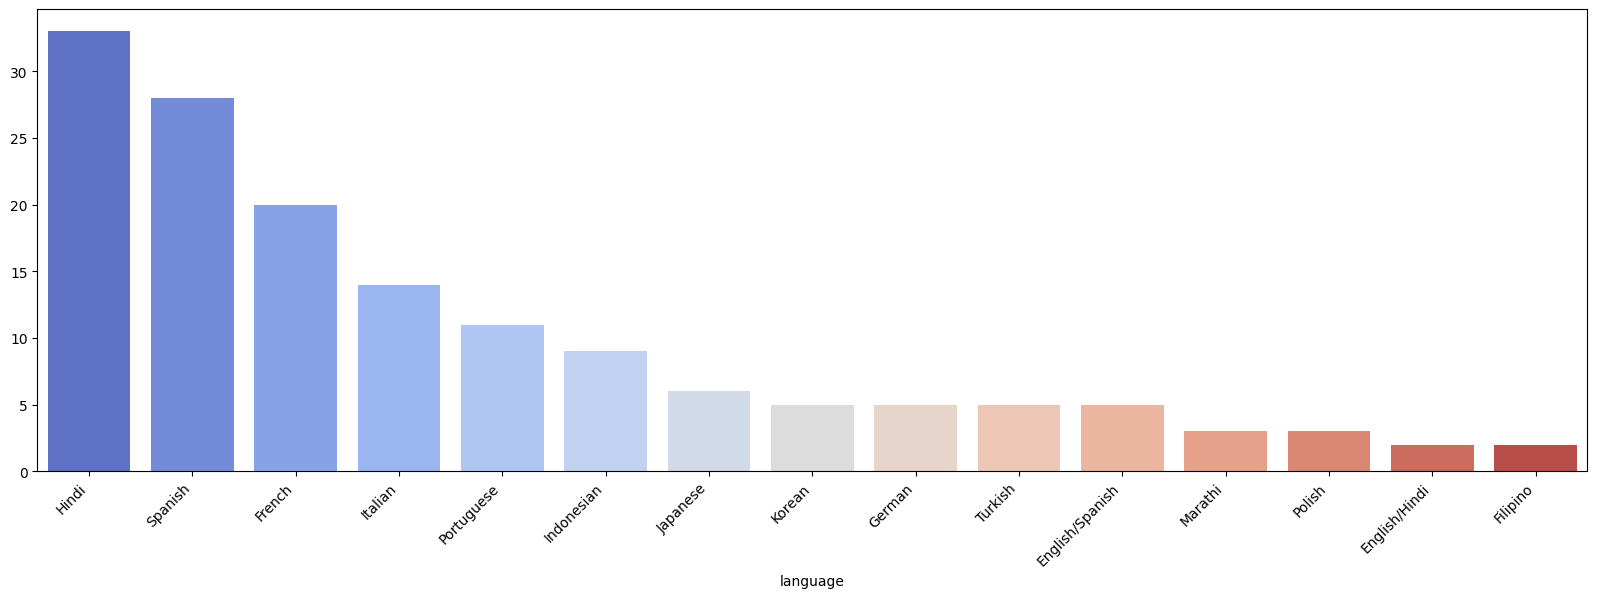

In [ ]:
## Importante el archivo content_df no posee idioma ("language"). Utilizo production_df

idiomas = production_df.groupby("language").count()["id_production"]
idiomas = idiomas.drop("English")
idiomas = idiomas.sort_values(ascending = False)[0:15]

plt.figure(figsize=(20, 6))

ax = sns.barplot(x = idiomas.index, y = idiomas.values, palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha ='right')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=da85ffec-f3f8-46e6-a8a8-28433ab3181c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>